In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ruptures as rpt

Import some jobs

/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_mat_db/job_6382.csv


array([[<AxesSubplot:xlabel='timestamp'>,
        <AxesSubplot:xlabel='timestamp'>,
        <AxesSubplot:xlabel='timestamp'>,
        <AxesSubplot:xlabel='timestamp'>]], dtype=object)

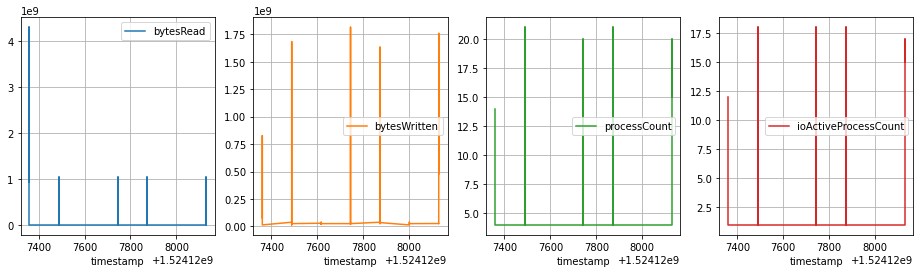

In [19]:
import os, random
job_files = []
dataset_path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation"
#dataset_path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_oth_db"
#dataset_path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_sop_db"
#dataset_path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_gysela"

for root, dirs, files in os.walk(dataset_path):
    for csv_file in files:
        if csv_file.endswith(".csv"):
            job_files.append(os.path.join(root, csv_file))

csv_file = random.choice(job_files)

#csv_file = os.path.join("/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_oth_db/job_1330.csv")
csv_file = os.path.join("/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_mat_db/job_6382.csv")
#csv_file = os.path.join("/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation/dataset_gysela/job_101329.csv")

print(csv_file)

df = pd.read_csv(csv_file, index_col=0, dtype=np.float32)
df.plot(x="timestamp", figsize=(16,4), sharex=True, grid=True, subplots=True, layout=(1, 4))
#df.head()


Basic plot

In [20]:
signal_w = df["bytesWritten"].values
signal_r = df["bytesRead"].values
#print(signal)

Now we use some algos clustering

In [21]:
import numpy as np
import time
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import silhouette_score

##############################################################################
# Compute clustering with KMeans
def clustering(signal, n):
    k_means = KMeans(init='k-means++', n_clusters=n, n_init=10)
    t0 = time.time()
    k_means.fit(signal)
    t_batch = time.time() - t0
    k_means_labels = k_means.labels_
    k_means_cluster_centers = k_means.cluster_centers_
    #print(k_means_labels, t_batch)
    return k_means_labels

def find_best_cluster(signal, min_diff=0.01, max_n=6):
    step = 2
    n_clusters = step
    best_score = -1
    n_samples = len(signal)
    best_preds = np.random.choice(n_clusters, n_samples)  # init with random labels

    while step <= max_n:
        preds = clustering(signal, step)
        score = silhouette_score(signal, preds, metric="euclidean")
        print(score)
        if score > best_score * (1 + min_diff):  # if better score
            best_score = score
            best_preds = preds
            n_clusters = step
        step += 1
    
    return best_preds, n_clusters

def changepoint_detection(changes):
    result=[]
    
    for idx in range(len(changes)-1):
        if changes[idx] != changes[idx+1]:
            #print(idx)
            result.append(idx+1)
    return result


(<Figure size 720x144 with 1 Axes>, [<AxesSubplot:>])

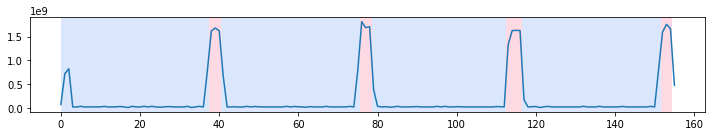

In [22]:
k_means_labels= clustering(signal_w.reshape(-1, 1), 2)
res = changepoint_detection(k_means_labels)
rpt.display(signal_w, res)

0.93434906
0.9615515
0.9585965
0.9479648
0.9361072
[0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 1 1 1 2] 3
0.9763135
0.99222225
0.98717946
0.98717946
0.98717946
[2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0] 3


/tmp/ipykernel_3319244/1466843934.py:11: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  k_means.fit(signal)
/tmp/ipykernel_3319244/1466843934.py:11: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  k_means.fit(signal)


(<Figure size 720x144 with 1 Axes>, [<AxesSubplot:>])

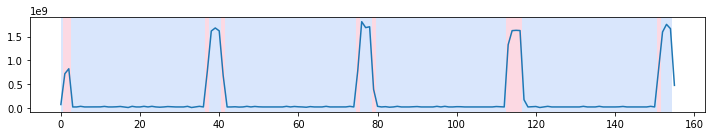

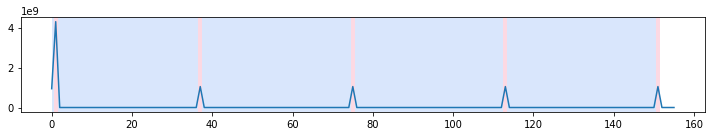

In [23]:
k_means_labels, n= find_best_cluster(signal_w.reshape(-1, 1))
print(k_means_labels, n)
res = changepoint_detection(k_means_labels)
rpt.display(signal_w, res)
k_means_labels, n= find_best_cluster(signal_r.reshape(-1, 1))
print(k_means_labels, n)
res = changepoint_detection(k_means_labels)
rpt.display(signal_r, res)

0.8999492
0.94062763
0.93735915
0.9292598
0.8661081
[0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 2 2 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 2 0 0 1] 3
0.96058613
0.947731
0.94949245
0.98717946
0.98717946
[0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 4 3 0 0 0] 5


/tmp/ipykernel_3319244/1466843934.py:11: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  k_means.fit(signal)


(<Figure size 720x144 with 1 Axes>, [<AxesSubplot:>])

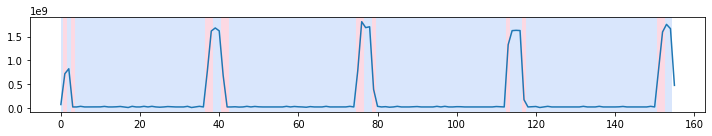

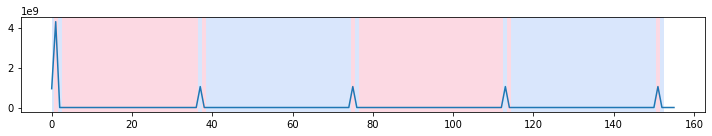

In [24]:
#delta signal
signal_w_del = df["bytesWritten"].diff().fillna(0).values
signal_r_del = df["bytesRead"].diff().fillna(0).values
k_means_labels, n= find_best_cluster(signal_w_del.reshape(-1, 1))
print(k_means_labels, n)
res = changepoint_detection(k_means_labels)
rpt.display(signal_w, res)
k_means_labels, n= find_best_cluster(signal_r_del.reshape(-1, 1))
print(k_means_labels, n)
res = changepoint_detection(k_means_labels)
rpt.display(signal_r, res)

Use Gaussian Misture model to estimate the distribution

ValueError: Expected 2D array, got 1D array instead:
array=[7.6521472e+07 7.2202650e+08 8.2654003e+08 2.5600000e+07 2.5600000e+07
 3.8400000e+07 2.5600000e+07 2.5600000e+07 2.6624000e+07 2.5600000e+07
 2.7136000e+07 3.6864000e+07 2.5600000e+07 2.5600000e+07 2.8672000e+07
 3.5328000e+07 2.5600000e+07 1.3824000e+07 3.8400000e+07 2.5600000e+07
 2.5600000e+07 3.8400000e+07 2.5600000e+07 3.8400000e+07 2.5600000e+07
 2.0480000e+07 2.5600000e+07 3.3792000e+07 3.0208000e+07 2.5600000e+07
 2.5600000e+07 2.5600000e+07 3.8400000e+07 1.3824000e+07 2.5600000e+07
 3.8400000e+07 2.5600000e+07 7.7713818e+08 1.6180961e+09 1.6820347e+09
 1.6212173e+09 6.8461773e+08 2.5600000e+07 2.5600000e+07 2.9184000e+07
 2.3040000e+07 2.5600000e+07 3.8400000e+07 2.5600000e+07 3.5840000e+07
 2.8160000e+07 2.5600000e+07 2.5600000e+07 2.5600000e+07 2.6624000e+07
 2.5600000e+07 2.5600000e+07 3.8400000e+07 2.5600000e+07 3.5328000e+07
 2.8672000e+07 2.5600000e+07 1.9456000e+07 3.2768000e+07 2.5600000e+07
 2.5600000e+07 2.5600000e+07 3.8400000e+07 2.5600000e+07 2.5600000e+07
 2.6624000e+07 2.5600000e+07 2.6112000e+07 3.7888000e+07 2.5600000e+07
 7.8486733e+08 1.8135941e+09 1.6893501e+09 1.7072497e+09 3.9469875e+08
 3.8400000e+07 2.5600000e+07 3.1744000e+07 2.0480000e+07 2.5600000e+07
 3.8400000e+07 2.5600000e+07 2.5600000e+07 2.5600000e+07 3.0208000e+07
 3.3792000e+07 2.5600000e+07 2.6624000e+07 2.5600000e+07 2.5600000e+07
 3.8400000e+07 2.5600000e+07 3.8400000e+07 2.5600000e+07 2.5600000e+07
 3.1232000e+07 3.0208000e+07 2.5600000e+07 2.5600000e+07 2.5600000e+07
 2.5600000e+07 2.5600000e+07 2.5600000e+07 2.6624000e+07 2.5600000e+07
 3.4304000e+07 2.9696000e+07 2.5600000e+07 1.3306880e+09 1.6259236e+09
 1.6323133e+09 1.6276070e+09 1.7681203e+08 2.5600000e+07 2.9184000e+07
 3.4816000e+07 1.3824000e+07 2.5600000e+07 3.8400000e+07 2.5600000e+07
 2.5600000e+07 2.5600000e+07 2.5600000e+07 2.5600000e+07 2.5600000e+07
 2.6624000e+07 2.5600000e+07 3.8400000e+07 2.5600000e+07 2.5600000e+07
 2.5600000e+07 3.8400000e+07 2.5600000e+07 2.6624000e+07 2.5600000e+07
 2.5600000e+07 2.8160000e+07 3.5840000e+07 2.5600000e+07 2.5600000e+07
 2.5600000e+07 2.6624000e+07 2.5600000e+07 2.5600000e+07 3.8400000e+07
 2.5600000e+07 8.1110630e+08 1.5980298e+09 1.7574134e+09 1.6672358e+09
 4.7815066e+08].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

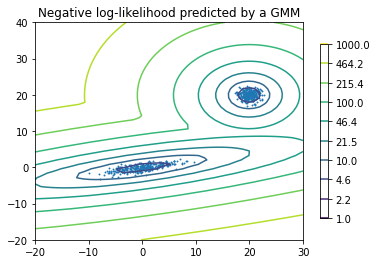

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

n_samples = 300

# generate random sample, two components
np.random.seed(0)

# generate spherical data centered on (20, 20)
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

# generate zero centered stretched Gaussian data
C = np.array([[0.0, -0.7], [3.5, 0.7]])
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

# concatenate the two datasets into the final training set
#X_train = np.vstack([shifted_gaussian, stretched_gaussian])
X_train = shifted_gaussian

# fit a Gaussian Mixture Model with two components
clf = mixture.GaussianMixture(n_components=2, covariance_type="full")
clf.fit(X_train)

# display predicted scores by the model as a contour plot
x = np.linspace(-20.0, 30.0)
y = np.linspace(-20.0, 40.0)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

CS = plt.contour(
    X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)
CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

Now we apply HMM model for phase detection

In [ ]:
import numpy as np
import tensorflow.compat.v2 as tf
tf.enable_v2_behavior()
import tensorflow_probability as tfp
from tensorflow_probability import distributions as tfd

observed_counts = tf.convert_to_tensor(signal)
print(observed_counts)

tf.Tensor(
[5.0249757e+08 8.4181018e+08 8.6814720e+08 8.9812992e+08 9.0353664e+08
 8.9300992e+08 9.0021888e+08 9.0447872e+08 8.6302758e+08 8.5934080e+08
 8.8342528e+08 9.0173440e+08 8.9411584e+08 8.9763840e+08 9.0116096e+08
 8.9174016e+08 8.9247744e+08 9.0038272e+08 8.7425094e+08 8.5262336e+08
 8.7433216e+08 8.8727552e+08 8.9079808e+08 8.9149478e+08 6.3635475e+08
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5700000e+02
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.4500000e+02 2.1200000e+02 0.0000000e+00 0.0000000e+00 3.5700000e+02
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5700000e+02
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000

In [ ]:
max_num_states = 10

def build_latent_state(num_states, max_num_states, daily_change_prob=0.05):

  # Give probability exp(-100) ~= 0 to states outside of the current model.
  active_states_mask = tf.concat([tf.ones([num_states]),
                                  tf.zeros([max_num_states - num_states])],
                                 axis=0)
  initial_state_logits = -100. * (1 - active_states_mask)

  # Build a transition matrix that transitions only within the current
  # `num_states` states.
  transition_probs = tf.fill([num_states, num_states],
                             0. if num_states == 1
                             else daily_change_prob / (num_states - 1))  
  padded_transition_probs = tf.eye(max_num_states) + tf.pad(
      tf.linalg.set_diag(transition_probs,
                         tf.fill([num_states], - daily_change_prob)),
      paddings=[(0, max_num_states - num_states),
                (0, max_num_states - num_states)])

  return initial_state_logits, padded_transition_probs

# For each candidate model, build the initial state prior and transition matrix.
batch_initial_state_logits = []
batch_transition_probs = []
for num_states in range(1, max_num_states+1):
  initial_state_logits, transition_probs = build_latent_state(
      num_states=num_states,
      max_num_states=max_num_states)
  batch_initial_state_logits.append(initial_state_logits)
  batch_transition_probs.append(transition_probs)

batch_initial_state_logits = tf.stack(batch_initial_state_logits)
batch_transition_probs = tf.stack(batch_transition_probs)
print("Shape of initial_state_logits: {}".format(batch_initial_state_logits.shape))
print("Shape of transition probs: {}".format(batch_transition_probs.shape))
print("Example initial state logits for num_states==3:\n{}".format(batch_initial_state_logits[2, :]))
print("Example transition_probs for num_states==3:\n{}".format(batch_transition_probs[2, :, :]))

Shape of initial_state_logits: (10, 10)
Shape of transition probs: (10, 10, 10)
Example initial state logits for num_states==3:
[  -0.   -0.   -0. -100. -100. -100. -100. -100. -100. -100.]
Example transition_probs for num_states==3:
[[0.95  0.025 0.025 0.    0.    0.    0.    0.    0.    0.   ]
 [0.025 0.95  0.025 0.    0.    0.    0.    0.    0.    0.   ]
 [0.025 0.025 0.95  0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]]


In [ ]:
trainable_log_rates = tf.Variable(
    tf.fill([batch_initial_state_logits.shape[0], max_num_states],
            tf.math.log(tf.reduce_mean(observed_counts))) + 
     tf.random.stateless_normal([1, max_num_states], seed=(42, 42)),
     name='log_rates')
    
hmm = tfd.HiddenMarkovModel(
  initial_distribution=tfd.Categorical(
      logits=batch_initial_state_logits),
  transition_distribution=tfd.Categorical(probs=batch_transition_probs),
  observation_distribution=tfd.Poisson(log_rate=trainable_log_rates),
  num_steps=len(observed_counts))
print("Defined HMM with batch shape: {}".format(hmm.batch_shape))

Defined HMM with batch shape: (10,)


Text(0, 0.5, 'Negative log marginal likelihood')

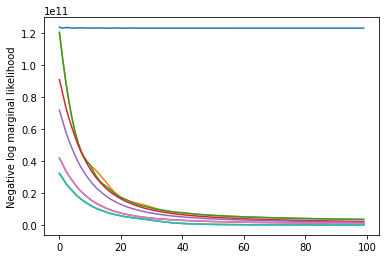

In [ ]:
rate_prior = tfd.LogNormal(5, 5)

def log_prob():
  prior_lps = rate_prior.log_prob(tf.math.exp(trainable_log_rates))
  prior_lp = tf.stack(
      [tf.reduce_sum(prior_lps[i, :i+1]) for i in range(max_num_states)])
  return prior_lp + hmm.log_prob(observed_counts)

losses = tfp.math.minimize(
    lambda: -log_prob(),
    optimizer=tf.optimizers.Adam(0.1),
    num_steps=100)
plt.plot(losses)
plt.ylabel('Negative log marginal likelihood')

In [ ]:
num_states = np.arange(1, max_num_states+1)
print(num_states, -losses[-1])


[ 1  2  3  4  5  6  7  8  9 10] tf.Tensor(
[-1.22956661e+11 -3.55939814e+09 -3.55865702e+09 -2.29522586e+09
 -1.80943488e+09 -1.04287661e+09 -1.04355923e+09 -1.20627832e+08
 -1.20654432e+08 -1.20652360e+08], shape=(10,), dtype=float32)


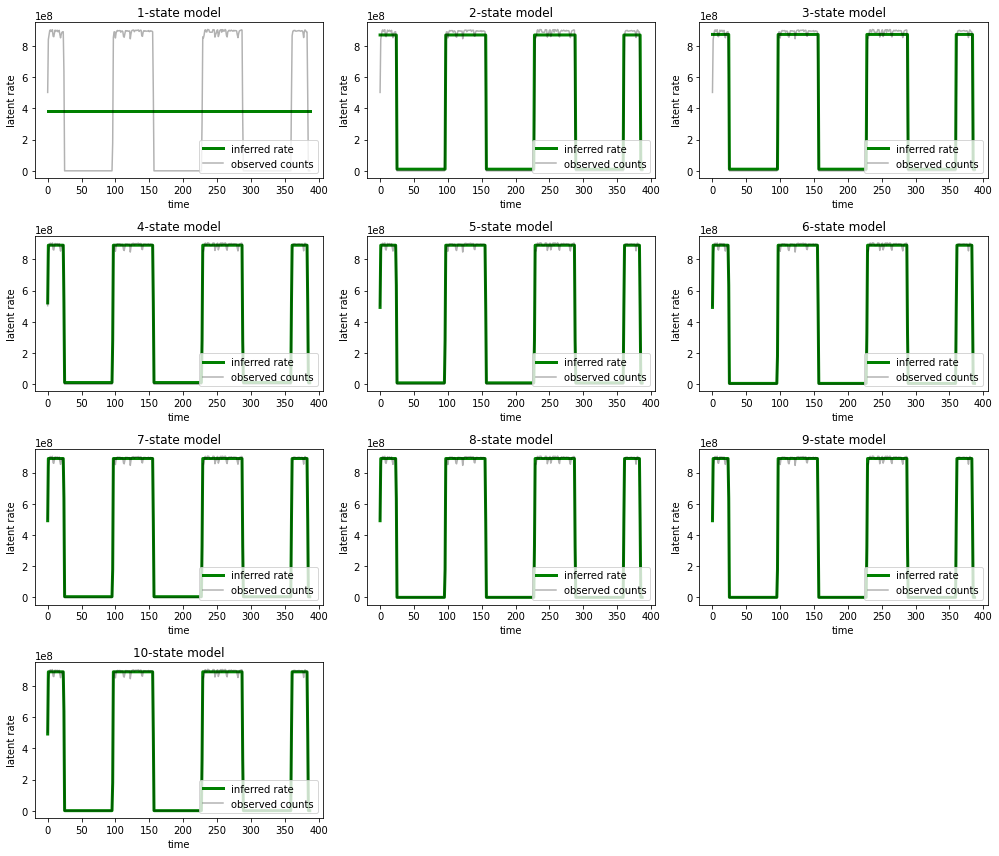

In [ ]:
rates = tf.exp(trainable_log_rates)
most_probable_states = hmm.posterior_mode(observed_counts)
fig = plt.figure(figsize=(14, 12))
for i, learned_model_rates in enumerate(rates):
  ax = fig.add_subplot(4, 3, i+1)
  ax.plot(tf.gather(learned_model_rates, most_probable_states[i]), c='green', lw=3, label='inferred rate')
  ax.plot(observed_counts, c='black', alpha=0.3, label='observed counts')
  ax.set_ylabel("latent rate")
  ax.set_xlabel("time")
  ax.set_title("{}-state model".format(i+1))
  ax.legend(loc=4)
plt.tight_layout()

Some biblio:
- https://arxiv.org/abs/2003.06222
- https://arxiv.org/pdf/1801.00718.pdf
- https://github.com/alan-turing-institute/TCPDBench
- https://www.youtube.com/watch?v=Sb89wJaCp7o&ab_channel=VideoLecturesChannel
- https://notebook.community/hildensia/bayesian_changepoint_detection/Example%20Code
- https://techrando.com/2019/08/14/a-brief-introduction-to-change-point-detection-using-python/
- https://schuetzgroup.github.io/sdt-python/changepoint.html
- https://centre-borelli.github.io/ruptures-docs/
- https://paperswithcode.com/task/change-point-detection
- https://github.com/YKatser/CPDE
- https://arxiv.org/pdf/2204.07403v1.pdf
- https://github.com/cruiseresearchgroup/TSCP2

Estimating cost value

In [ ]:
def choose_random_job(dataset_path = "C:\\Users\\a770398\\IO-SEA\\io-sea-3.4-analytics\\dataset_generation\\dataset_generation"):
    job_files = []    
    for root, dirs, files in os.walk(dataset_path):
        for csv_file in files:
            if csv_file.endswith(".csv"):
                job_files.append(os.path.join(root, csv_file))
    return random.choice(job_files)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import ruptures as rpt
import os, random
csv_file = choose_random_job()
df = pd.read_csv(csv_file, index_col=0)
df.plot(x="timestamp", figsize=(16,4), sharex=True, grid=True, subplots=True, layout=(1, 4))

IndexError: Cannot choose from an empty sequence

/home_nfs/phamtt/IO-SEA/venv/lib64/python3.8/site-packages/ruptures/costs/costnormal.py:28: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


[5, 10, 15, 20, 25, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 360, 365, 370, 375, 380, 385, 388]
8298540092.0
compute= [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165] -- write = [0, 17719502585.0, 17696464370.0, 10710.0, 17755852800.0, 17482856185.0, 17583208185.0, 18012979200.0, 17815756800.0, 17905152000.0, 17732301437.5, 17811251200.0, 17683048185.0, 17924608892.5, 17966387200.0, 17574708092.5, 13387.5, 17928806400.0, 17668711675.0]
[5, 10, 15, 20, 25, 30, 45, 50, 55, 60, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 175, 185, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 315, 320, 330, 345, 350, 355, 360, 365, 370, 375, 380, 385, 388]
3.139412076912823e+18
compute= [0, 5, 10, 15, 30, 35, 50, 55, 60, 65, 70, 75, 80, 85, 90, 105, 120, 125, 130, 135, 140, 145, 15

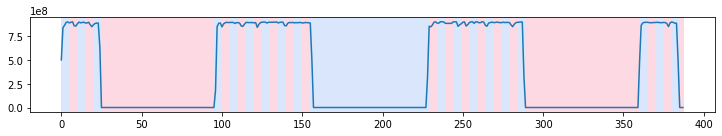

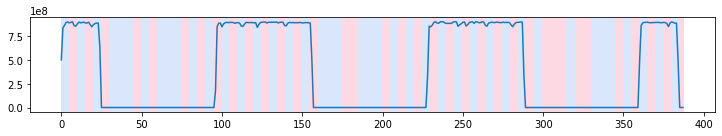

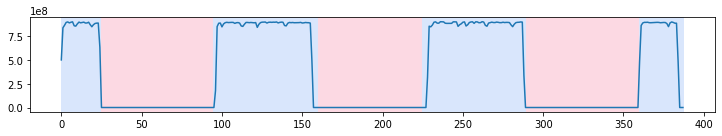

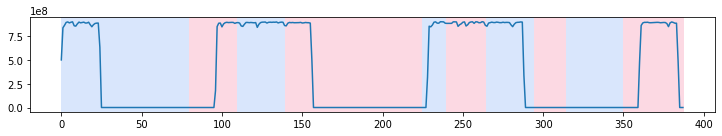

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate

signal = df[["bytesWritten"]].to_numpy()
for cost in [rpt.costs.CostL1(), rpt.costs.CostL2(), rpt.costs.CostNormal(), rpt.costs.CostLinear()]:
             #rpt.costs.CostAR(order=10), rpt.costs.CostMl(metric=np.eye(1)), rpt.costs.CostRank()]:
    result = rpt.Pelt(custom_cost=cost).fit(signal).predict(pen=1000)
#pelt_result = rpt.Pelt(model="rbf", min_size=3).fit(signal).predict(pen=0.1)
#print(cost.fit(signal).error(0, len(signal)))
    print("===================")
    rpt.display(signal, result)
    print(result)
    print(cost.sum_of_costs(result))
    
    # reconstruction loop:
    compute = [0]
    write = [0]
    bandwidth = [0]
    closing_point = 0
    for i_brkpt, brkpt in enumerate(result[:-1]):
        if (i_brkpt % 2) == 0: # starting point
            starting_point = brkpt
            compute.append(compute[-1] + (starting_point - closing_point))
        if (i_brkpt %2) != 0: # closing point
            closing_point = brkpt
            phase_volume = integrate.trapz(y=signal[starting_point: closing_point].flatten(), dx=5)
            write.append(phase_volume)
            
    print(f"compute= {compute} -- write = {write}")
        
            
            

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ruptures as rpt
import os, random, time

# choose a job
def list_jobs(dataset_path = "/home_nfs/phamtt/IO-SEA/iosea-wp3-recommandation-system/dataset_generation/dataset_generation"):
    job_files = []
    job_ids = []
    dataset = []
    for root, dirs, files in os.walk(dataset_path):
        for csv_file in files:
            if csv_file.endswith(".csv"):
                job_files.append(os.path.join(root, csv_file))
                job_ids.append(csv_file.split("_")[-1].split(".csv")[0])
                dataset.append(os.path.split(root)[-1])
    return job_files, job_ids, dataset
job_files, job_ids, datasets = list_jobs()


Benchmarking offline algos

In [ ]:
df = pd.DataFrame(columns=["dataset", "jobid", "timeserie", "signal_length", "n_brkpts",
                           "algo_name", "cost_function", "loss", "penalty", "computation_time"])

job_files, job_ids, datasets = list_jobs()
for job_file, job_id, dataset in zip(job_files[0:2], job_ids[0:2], datasets[0:2]):
    df_signal = pd.read_csv(job_file, index_col=0)
    for ts in ["bytesWritten", "bytesRead"]:
        signal = df_signal[[ts]].to_numpy()
        signal_dim = signal.shape[1]

        # define costs
        costs = [rpt.costs.CostL1(), rpt.costs.CostL2(), rpt.costs.CostNormal(), rpt.costs.CostLinear(),
                rpt.costs.CostCLinear(), rpt.costs.CostAR(order=3), rpt.costs.CostMl(metric=np.eye(signal_dim)), rpt.costs.CostRank()]
        costs_names = ["L1", "L2", "Gauss", "Linear", "Clinear", "AR", "Mala", "Rank"]

        # algos = [rpt.Pelt(custom_cost=cost, min_size=2), rpt.Binseg(custom_cost=cost),
        #          rpt.BottomUp(custom_cost=cost), rpt.Window(custom_cost=cost, width=10)]

        algos = [rpt.Pelt, rpt.Binseg, rpt.BottomUp, rpt.Window]

        algos_names = ["Pelt", "Binseg", "Botup", "Wind"]

        penalties = np.logspace(-3, 3, num=6).tolist()
# ["dataset", "jobid", "timeserie", "signal_length", "n_brkpts",
#                            "algo_name", "cost_function", "loss", "penalty", "computation_time"]
        for algo, algo_name in zip(algos[0:2], algos_names[0:2]):
            for cost, costs_name in zip(costs[0:2], costs_names[0:2]):
                for pen in penalties[0:2]:
                    try:
                        start_time = time.time()
                        result = algo(custom_cost=cost, min_size=2).fit_predict(signal, pen)
                        duration = time.time() - start_time
                        n_brkpts = len(result) - 1
                        loss = cost.sum_of_costs(result)
                        df = df.append({"dataset": dataset,
                                        "jobid": job_id,
                                        "timeserie": ts,
                                        "signal_length": signal.shape[0],
                                        "n_brkpts": n_brkpts,
                                        "algo_name": algo_name,
                                        "cost_function": costs_name,
                                        "loss": loss,
                                        "penalty": pen,
                                        "computation_time": duration,
                                        },
                                    ignore_index=True)
                    except:
                        pass
                
df.to_csv("_".join(algos_names) + "_bench.csv")

/home_nfs/phamtt/IO-SEA/venv/lib64/python3.8/site-packages/ruptures/costs/costnormal.py:28: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(
/home_nfs/phamtt/IO-SEA/venv/lib64/python3.8/site-packages/ruptures/costs/costnormal.py:28: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(
/home_nfs/phamtt/IO-SEA/venv/lib64/python3.8/site-packages/ruptures/costs/costnormal.py:28: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(
/home_nfs/phamtt/IO-SEA/venv/lib64/python3.8/site-packages/ruptures/costs/costnormal.py:28: UserWarning: New behaviour in v1.1.5: a small bias is added to the covariance matrix to cope with truly constant segments (see PR#198).
  warnings.warn(


In [ ]:
df.head(20)

,dataset,jobid,timeserie,signal_length,n_brkpts,algo_name,cost_function,loss,penalty,computation_time


Measure the reconstruction distance